# Projeto Integrador

O primeiro passo da etapa de pré-processamento dos dados é importar as bibliotecas necessárias para essa tarefa.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from ydata_profiling import ProfileReport
import hvplot.pandas
import missingno as msno
import altair as alt

/home/fshirahige/anaconda3/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/home/fshirahige/anaconda3/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


Importando o dataset do projeto:

In [2]:
df = pd.read_csv('Bases/cs_bisnode_panel.csv')

Retirando as colunas com alto indice de missing data, conforme orientado nas instruções.

In [3]:
df = df.drop(['COGS', 'finished_prod', 'net_dom_sales', 'net_exp_sales', 'wages', 'D'], axis=1)

Removendo dos dados os registros do ano de 2016

In [4]:
df = df[df['year']!=2016]

Verificando o tipo de dado de cada variável do dataset:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278086 entries, 0 to 287828
Data columns (total 42 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   comp_id               278086 non-null  float64
 1   begin                 278086 non-null  object 
 2   end                   278086 non-null  object 
 3   amort                 270070 non-null  float64
 4   curr_assets           277955 non-null  float64
 5   curr_liab             277955 non-null  float64
 6   extra_exp             269300 non-null  float64
 7   extra_inc             269300 non-null  float64
 8   extra_profit_loss     270626 non-null  float64
 9   fixed_assets          277955 non-null  float64
 10  inc_bef_tax           270649 non-null  float64
 11  intang_assets         277946 non-null  float64
 12  inventories           277955 non-null  float64
 13  liq_assets            277955 non-null  float64
 14  material_exp          270070 non-null  float64
 15  

In [6]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,287819,287820,287821,287822,287823,287824,287825,287826,287827,287828
comp_id,1001034.0,1001034.0,1001034.0,1001034.0,1001034.0,1001034.0,1001034.0,1001034.0,1001034.0,1001034.0,...,464120938496.0,464120938496.0,464120938496.0,464120938496.0,464120938496.0,464120938496.0,464120938496.0,464120938496.0,464120938496.0,464120938496.0
begin,2005-01-01,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,...,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01
end,2005-12-31,2006-12-31,2007-12-31,2008-12-31,2009-12-31,2010-12-31,2011-12-31,2012-12-31,2013-12-31,2014-12-31,...,2006-12-31,2007-12-31,2008-12-31,2009-12-31,2010-12-31,2011-12-31,2012-12-31,2013-12-31,2014-12-31,2015-12-31
amort,692.59259,603.703674,425.925934,300.0,207.40741,177.777771,155.555557,140.740738,140.740738,29.629629,...,292.59259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
curr_assets,7266.666504,13122.222656,8196.295898,8485.185547,5137.037109,2096.296387,3607.407471,148.148148,140.740738,144.444443,...,1729.629639,2203.703613,1714.814819,1796.296265,1781.481445,1807.407349,1518.518555,988.888916,644.444458,166.666672
curr_liab,7574.074219,12211.111328,7800.0,7781.481445,15300.0,19629.628906,22555.554688,21429.628906,21851.851562,22340.740234,...,818.518494,711.111084,44.444443,25.925926,0.0,3.703704,96.296295,77.777779,233.333328,270.370361
extra_exp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
extra_inc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
extra_profit_loss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fixed_assets,1229.629639,725.925903,1322.222168,1022.222229,814.814819,637.037048,481.481476,340.740753,200.0,170.370377,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Vamos converter os tipos de dados algumas colunas para que estas esteja coerentes com as descrição das variáveis, a saber:

- comp_id: como é a identificação da empresa, deve ser considerada uma string (object)
- begin: converter para data
- end: converter para data
- founded_date: converter para data
- exit_date: converter para data
- nace_main: converter para string (object)
- ind2: converter para string (object)
- ind: converter para string (object)

In [7]:
df['comp_id'] = df['comp_id'].astype('object')
df['begin'] = pd.to_datetime(df['begin'],format="%Y-%m-%d", errors='coerce')
df['end'] = pd.to_datetime(df['end'],format="%Y-%m-%d", errors='coerce')
df['founded_date'] = pd.to_datetime(df['founded_date'],format="%Y-%m-%d", errors='coerce')
df['exit_date'] = pd.to_datetime(df['exit_date'],format="%Y-%m-%d", errors='coerce')
df['nace_main'] = df['nace_main'].astype('object')
df['ind2'] = df['ind2'].astype('object')
df['ind'] = df['ind'].astype('object')

In [8]:
#Verificando se a conversão funcionou:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278086 entries, 0 to 287828
Data columns (total 42 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   comp_id               278086 non-null  object        
 1   begin                 278086 non-null  datetime64[ns]
 2   end                   278086 non-null  datetime64[ns]
 3   amort                 270070 non-null  float64       
 4   curr_assets           277955 non-null  float64       
 5   curr_liab             277955 non-null  float64       
 6   extra_exp             269300 non-null  float64       
 7   extra_inc             269300 non-null  float64       
 8   extra_profit_loss     270626 non-null  float64       
 9   fixed_assets          277955 non-null  float64       
 10  inc_bef_tax           270649 non-null  float64       
 11  intang_assets         277946 non-null  float64       
 12  inventories           277955 non-null  float64       
 13 

O próxima passo é verificar a quantidade de missing values em cada coluna:

<Axes: >

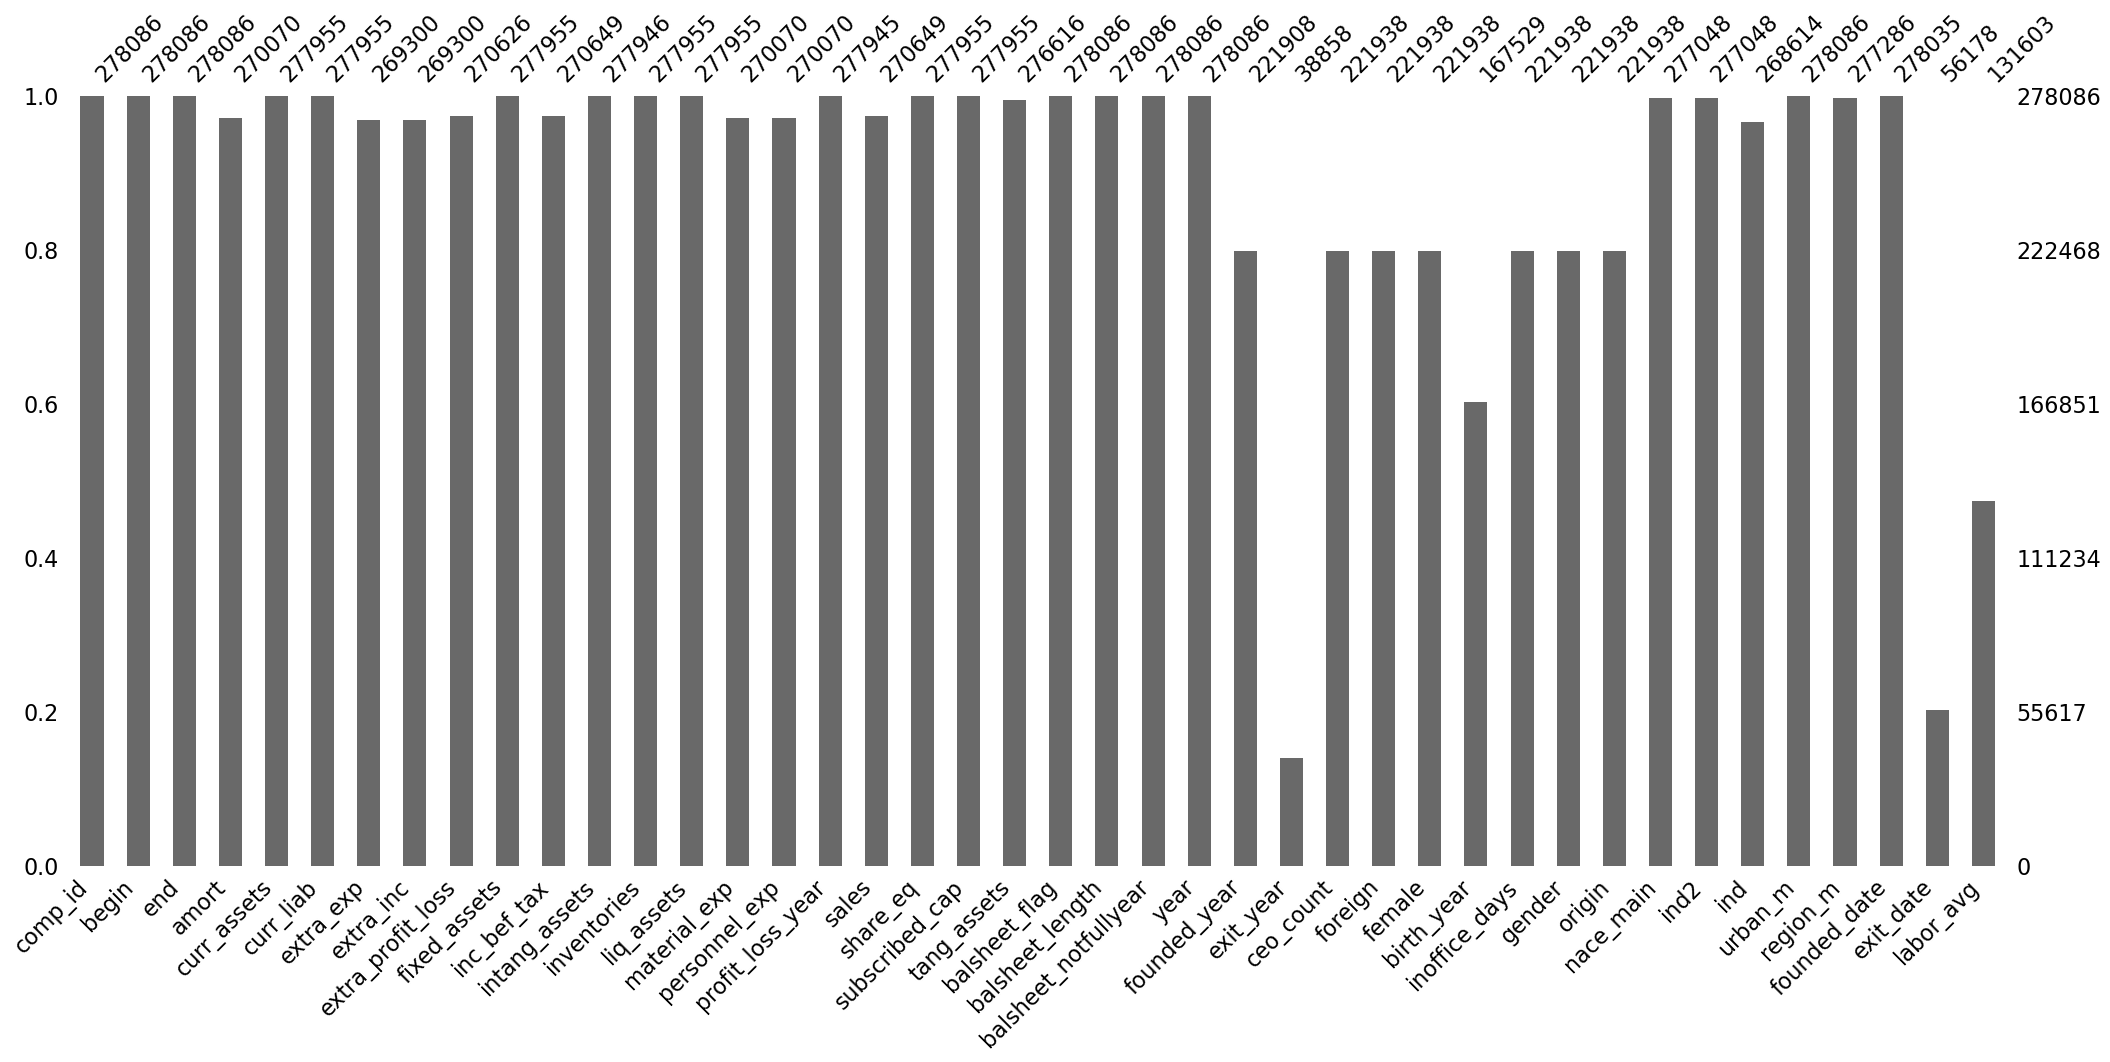

In [9]:
msno.bar(df)

In [10]:
missing_values = df.isna().sum()/len(df)
missing_values = pd.DataFrame({ 'Percentual_Valores_Faltantes': missing_values}).reset_index()
missing_values[missing_values['Percentual_Valores_Faltantes'] > 0]

,index,Percentual_Valores_Faltantes
3,amort,0.028826
4,curr_assets,0.000471
5,curr_liab,0.000471
6,extra_exp,0.031595
7,extra_inc,0.031595
8,extra_profit_loss,0.026826
9,fixed_assets,0.000471
10,inc_bef_tax,0.026744
11,intang_assets,0.000503
12,inventories,0.000471


A variável "labor_avg" (número de empregados) possui mais da metade dos dados faltantes. Como há um variável chamada "personnel_exp", que representa os gastos com pessoal, vamos verificar se há algum correlação entre essas duas variáveis por meio de um gráfico de dispersão:

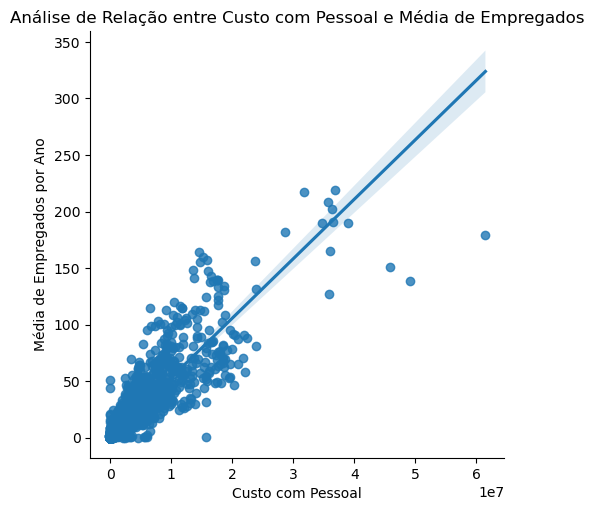

In [11]:
sns.lmplot(x="personnel_exp", y="labor_avg", data=df)
plt.xlabel('Custo com Pessoal')
plt.ylabel('Média de Empregados por Ano')
plt.title('Análise de Relação entre Custo com Pessoal e Média de Empregados')
plt.show()

Como há uma correlação não muito forte e com pontos fora do intervalo de confiança da reta do modelo de regressão linear para essa duas variáveis, vamos mantê-la no dataset, preencher os dados faltantes com a média e avaliar durante a fase de modelagem se essa variável ajuda ou prejudica o desempenho dos modelos de predição.

Para as variáveis que são categóricas e que tem missing values e podem a priori agregar pouco ao modelo (ou até mesmo criar viés, pois não evidência científica que gênero ou origem influenciam na gestão de uma empresa), vamos excluí-las, a saber:

- gender
- origin
- nace_main
- ind2
- ind

Para as colunas com a data e ano de saída (exit_date e exit_year), há muitos valores faltantes e a coluna 'in_operation' já contém essa informação. Assim, vamos excluí-la também.

Outras colunas, como foreign e female também pode criar viés no modelo. Logo serão excluídas também.

In [15]:
df = df.drop(['gender', 'origin', 'nace_main', 'ind2', 'ind', 'exit_date', 'exit_year', 'foreign', 'female'], axis=1)

Para as demais colunas, vamos substituir pela média do valor por empresa

In [14]:
#Criando dataframe com a média das variáveis numéricas por empresa.
media_variavel = df.groupby('comp_id').agg({'material_exp': 'mean', 'personnel_exp': 'mean',
                                             'profit_loss_year': 'mean', 'sales': 'mean', 'share_eq': 'mean' , 'labor_avg': 'mean'})

#Caso haja algum empresa em valor em quaisquer anos, consideraremos ZERO o valor da variável:
media_variavel = media_variavel.fillna(0)

#Ajustando o nome das colunas para facilitar o merge com o dataframe principal (incluindo 'Mean_' no início de todas, exceto 'comp_id'
nome_coluna = []
for coluna in list(media_variavel.columns):
    nome_coluna.append('Mean_'+coluna)
media_variavel.columns = nome_coluna
media_variavel = media_variavel.reset_index()
media_variavel.head()

,comp_id,Mean_material_exp,Mean_personnel_exp,Mean_profit_loss_year,Mean_sales,Mean_share_eq,Mean_labor_avg
0,1001034.0,20556.565742,9924.916011,-2135.016820,29625.589577,-11450.505110,0.083333
1,1001541.0,1973.544939,0.000000,-1281.481475,2494.708949,110015.874670,0.000000
2,1002029.0,490865.432292,32496.296658,15964.608873,592487.664931,92123.045139,0.369336
3,1003200.0,9969.444504,5271.759216,-1643.981527,12547.222137,-17795.833252,0.000000
4,1004012.0,1513.425932,3357.870419,296.296295,5485.185265,-417.129643,0.083333


A partir do dataframe com as médias por coluna, vamos preencher os valores faltantes das colunas numéricas do dataframe principal com essas médias.

<Axes: >

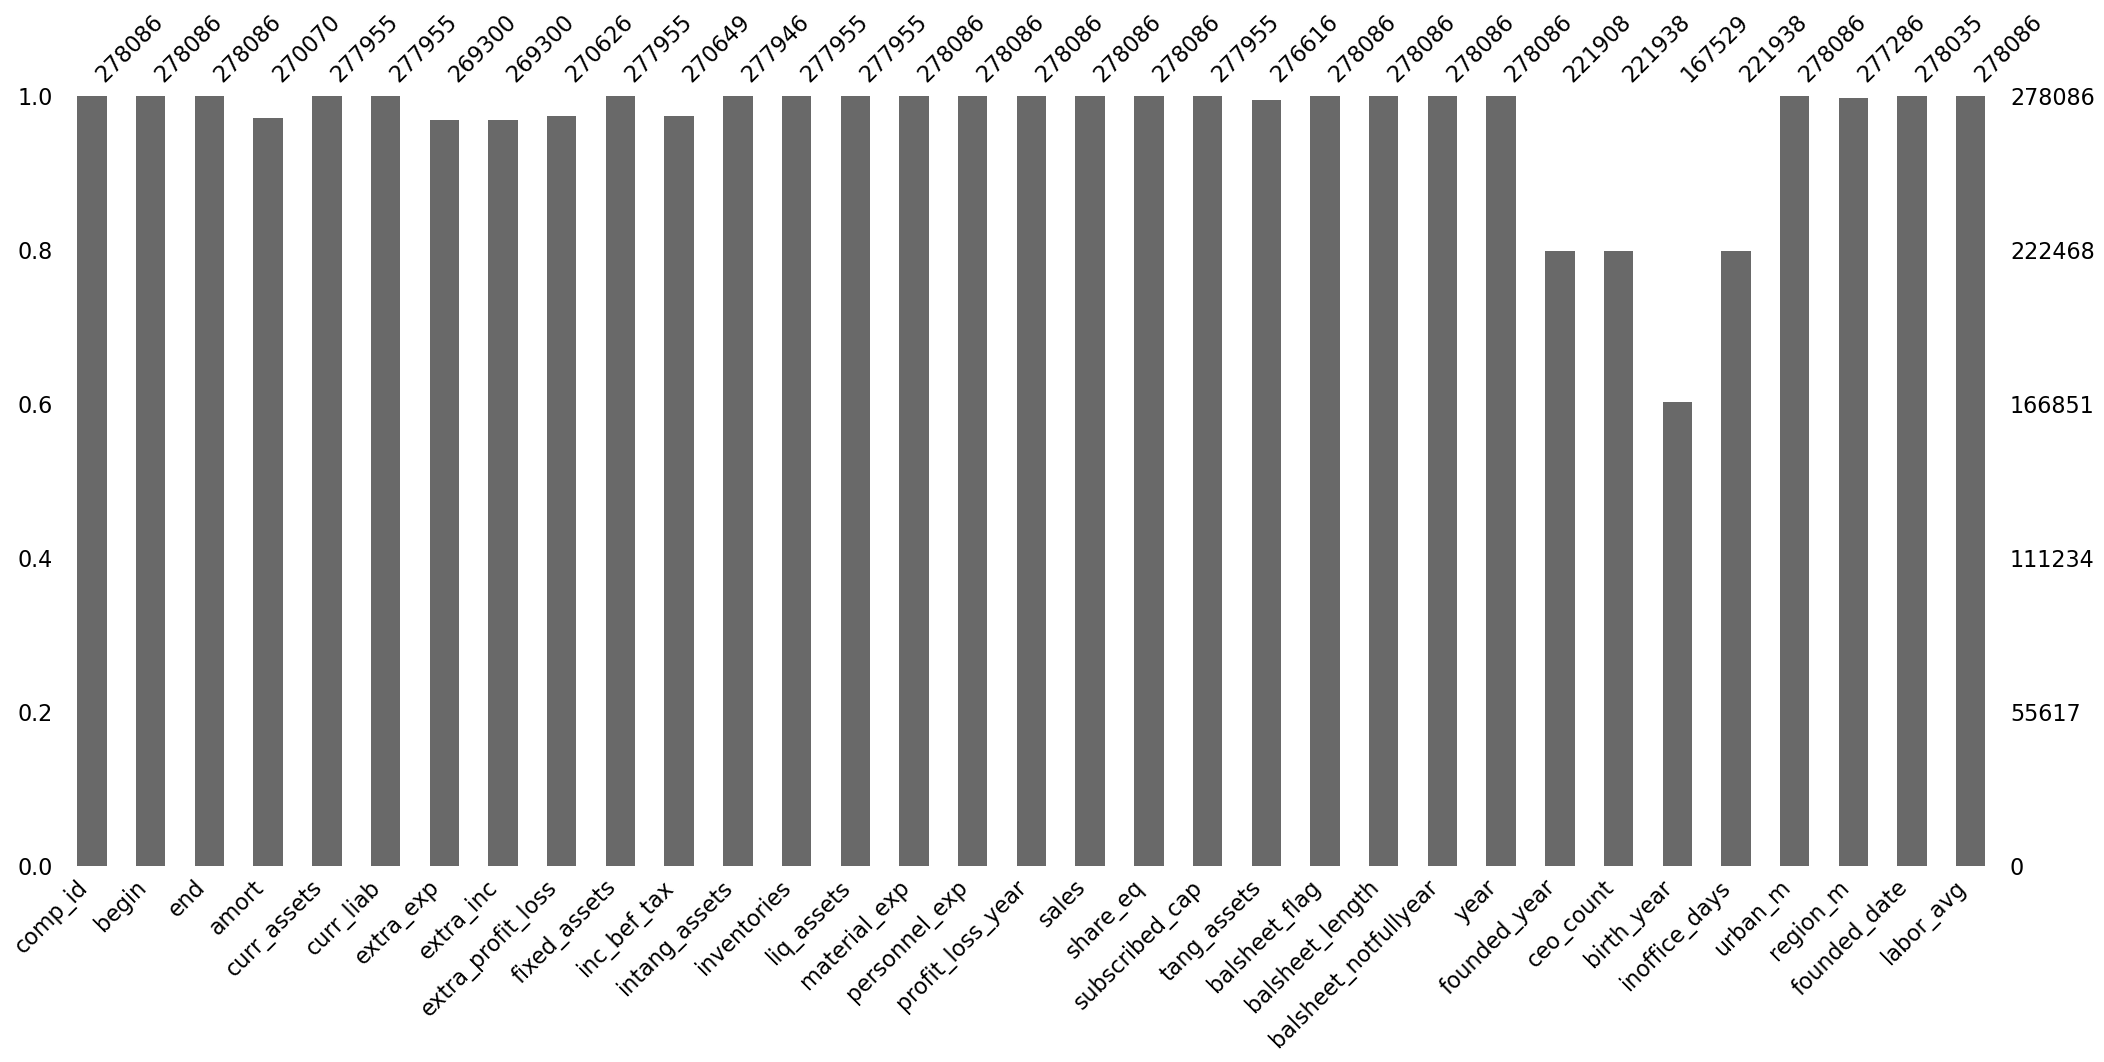

In [16]:
#Vamos usar uma lista com os nomes das colunas para iterar e facilitar o preenchimento
for coluna in list(media_variavel.columns)[1:]: 
    # mescla o df principal com o df com médias (o nome da coluna desse df começa com Mean)
    df = pd.merge(df, media_variavel[['comp_id',coluna]], how = 'left', on = ['comp_id'])
    #preenche os dados faltantes com a média por empresa da variável
    df[coluna[5:]] = df[[coluna[5:],coluna]].apply(lambda x : x[coluna] if pd.isna(x[coluna[5:]]) else x[coluna[5:]], axis = 1)
    #Remove a coluna com o nome Mean
    df = df.drop([coluna], axis=1)

# Verifica se o código acima foi efetivo
msno.bar(df)

Com os variáveis numéricas sem dados faltantes, restam as das variáveis categóricas, datas e binárias. Para as variáveis "founded_date", vamos usar a moda (valor mais frequente), pois os valores faltantes nessa coluna representam menos de 0,1%.

In [17]:
df["founded_date"].fillna(df["founded_date"].mode()[0], inplace = True)
#Verificando se todas as linhas dessa coluna foram preenchidas.
df["founded_date"].isnull().sum()

0

Vamos analisar a coluna 'region_m'e os seus dados faltantes:

In [18]:
df['region_m'].value_counts()

Central    167078
East        68243
West        41965
Name: region_m, dtype: int64

In [19]:
df['region_m'].describe()

count      277286
unique          3
top       Central
freq       167078
Name: region_m, dtype: object

In [21]:
# Missing values
print(df['region_m'].isna().sum())
print(df['region_m'].isna().sum()/len(df))

800
0.002876807893960861


Os dados faltantes da coluna 'region_m' representa menos de 0,3% dos valores da coluna (800 obseervações). Para evitar viés, vamos usar a moda nessa colunba:

In [22]:
df['region_m'].fillna(df['region_m'].mode()[0], inplace = True)
#Verificando se todas as linhas dessa coluna foram preenchidas.
df['region_m'].isnull().sum()

0

O próximo passo é criar uma coluna com a idade da empresa:

In [23]:
# Criando a coluna com a idade da empresa
df['company_age'] = df['year'] - df['founded_year']

Como iremos criar uma coluna para verificar se a empresa estava operando ou não a partir dos dados da coluna 'sales', verificaremos a qualidade das informações dessa última coluna:

In [26]:
#Vamos dividir a coluna de 'sales' por 1 milhão para facilitar a visualização
df_MM = df['sales']/1000000
df_MM.describe()

count    278086.000000
mean          0.475614
std           3.819757
min         -14.725589
25%           0.004193
50%           0.029087
75%           0.107681
max         111.029448
Name: sales, dtype: float64

Esse coluna possui valores negativos, o que não faz sentido para faturamento em 1 ano. Nesse caso, consideraremos os valores negativos como ZERO.

In [31]:
df['sales'] = df['sales'].apply(lambda x: 0 if x < 0 else x)

Verificando se o código acima funcionou:

In [32]:
df_MM = df['sales']/1000000
df_MM.describe()

count    278086.000000
mean          0.475689
std           3.819635
min           0.000000
25%           0.004193
50%           0.029087
75%           0.107681
max         111.029448
Name: sales, dtype: float64

Como o objetivo é predizer se uma empresa deicará de operar em até dois anos, vamos criar a partir dos dados da coluna 'sales' uma nova coluna para verificar se a empresa estava operando ou não no final do período, que será a variável resposta dos modelos. O primeiro passo é criar um dataframe somente com os valores de faturamento por ano e empresa. Como o objetivo é ver se a empresa estava operando ao final do período e vamos utilizar os dados de 2012 para estimar os modelos de predição, os dois últimos anos devem ser zero. Vamos considerar para a análise somente esses dois anos.

In [33]:
#Criando um um dataframe somente com os anos de 2014 e 2015
df_sales = df[(df['year']==2014) & (df['year']==2015)]
#criando um dataframe que soma os dados de faturamento cada empresa nesses dois anos.
df_sales = pd.DataFrame(df.groupby(["comp_id"])['sales'].sum()).reset_index()
df_sales

,comp_id,sales
0,1.001034e+06,3.258815e+05
1,1.001541e+06,1.746296e+04
2,1.002029e+06,5.332389e+06
3,1.003200e+06,1.003778e+05
4,1.004012e+06,4.388148e+04
...,...,...
46407,4.640446e+11,5.526323e+07
46408,4.640568e+11,2.590778e+05
46409,4.640793e+11,0.000000e+00
46410,4.641050e+11,1.949237e+06


Assim, as empresas que tiveram faturamento zero em 2014 e 2015 deve ser consideradas como fora de operação. Vamos criar a coluna com a variável resposta com essas informações:

In [34]:
df_sales['in_operation'] = df_sales['sales'].apply(lambda x: 'No' if x == 0 else 'yes')
df_sales

,comp_id,sales,in_operation
0,1.001034e+06,3.258815e+05,yes
1,1.001541e+06,1.746296e+04,yes
2,1.002029e+06,5.332389e+06,yes
3,1.003200e+06,1.003778e+05,yes
4,1.004012e+06,4.388148e+04,yes
...,...,...,...
46407,4.640446e+11,5.526323e+07,yes
46408,4.640568e+11,2.590778e+05,yes
46409,4.640793e+11,0.000000e+00,No
46410,4.641050e+11,1.949237e+06,yes


Vamos contar quantas empresas estavam operando:

In [35]:
df_sales['in_operation'].value_counts()/df_sales['in_operation'].count()*100

yes    91.15315
No      8.84685
Name: in_operation, dtype: float64

Cerca de 8,84% das empresas não estão mais operando.

Vamos juntar os dados da coluna que diz se a empresa estava em operação ('in_operation') ao dataframe inicial:

In [36]:
df = pd.merge(df, df_sales[['comp_id','in_operation']], how = 'left', on = ['comp_id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278086 entries, 0 to 278085
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   comp_id               278086 non-null  object        
 1   begin                 278086 non-null  datetime64[ns]
 2   end                   278086 non-null  datetime64[ns]
 3   amort                 270070 non-null  float64       
 4   curr_assets           277955 non-null  float64       
 5   curr_liab             277955 non-null  float64       
 6   extra_exp             269300 non-null  float64       
 7   extra_inc             269300 non-null  float64       
 8   extra_profit_loss     270626 non-null  float64       
 9   fixed_assets          277955 non-null  float64       
 10  inc_bef_tax           270649 non-null  float64       
 11  intang_assets         277946 non-null  float64       
 12  inventories           277955 non-null  float64       
 13 

Agora, vamos filtrar os dados de 2012 e manter no dataframe somente as empresas com faturamento abaixo de 10 milhões e acima de 1000 euros.

In [37]:
#Filtro para o ano de 2012
df = df[df['year']==2012]

In [38]:
# Filtro para as empresas com faturamento abaixo de 10 milhões e acima de 1000 euros
df = df[(df['sales']<10000000) | (df['sales']>1000)]

In [39]:
df.head()

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,...,founded_year,ceo_count,birth_year,inoffice_days,urban_m,region_m,founded_date,labor_avg,company_age,in_operation
7,1001034.0,2012-01-01,2012-12-31,140.740738,148.148148,21429.628906,0.0,0.0,0.0,340.740753,...,1990.0,2.0,1954.0,4895.5,1,Central,1990-11-19,0.083333,22.0,yes
14,1001541.0,2012-01-01,2012-12-31,481.481476,9629.629883,1303.703735,0.0,0.0,0.0,190566.671875,...,2008.0,1.0,1974.0,3222.0,3,Central,2008-02-24,0.000000,4.0,yes
23,1002029.0,2012-01-01,2012-12-31,14929.629883,203885.187500,120444.453125,0.0,0.0,0.0,23459.259766,...,2006.0,2.0,1975.0,3101.0,3,East,2006-07-03,0.458333,6.0,yes
34,1003200.0,2012-01-01,2012-12-31,25.925926,22.222221,10996.295898,0.0,0.0,0.0,0.000000,...,2003.0,2.0,NaN,1754.0,1,Central,2003-10-21,0.000000,9.0,yes
47,1007261.0,2012-01-01,2012-12-31,0.000000,255.555557,9207.407227,0.0,0.0,0.0,0.000000,...,2010.0,1.0,1962.0,1539.0,1,Central,2010-08-26,0.083333,2.0,yes


O próximo passo é criar a coluna por porte de faturamento. A União Europeia define como micro empresas aqueles com faturamento até 2 milhões de euros por ano, enquanto as pequenas e as médias tem que ter uma receita de até 10 milhões e 50 milhões, respectivamente. Como foi retirada da base os faturamentos acima de 10 milhões de euros, esse corte cria somente dois grupos. Assim, vamos analisar a distribuição de faturamento no dataset em questão.

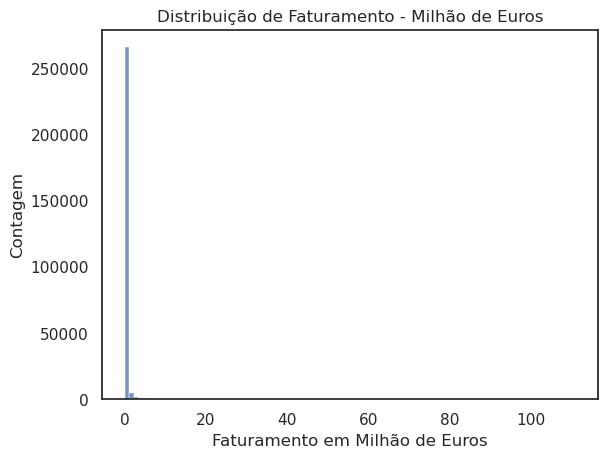

In [64]:
#Vamos usar a pandas series criada com o faturamento na escala de milhão
sns.histplot(data=df_MM, bins=100)
plt.xlabel('Faturamento em Milhão de Euros')
plt.ylabel('Contagem')
plt.title('Distribuição de Faturamento - Milhão de Euros')
plt.show()

De acordo com o histograma acima, que foi dividido em grupos de 1 milhão de euros, a grande maioria das empresas têm faturamento abaixo de 1 milhão em 2012 (variável assimétrica). Assim, para que na modelagem não haja grupos com baixo número de observações, vamos dividir em 2 grupos. Para tal, será aplicado o seguinte critério:

- pequena empresa: faturamento menor do que 50 mil
- média e grande empresa: faturamento acim 50 mil

In [55]:
# Criando a coluna com o porte da empresa por faturamento
df['company_size'] = df['sales'].apply(lambda x: 'small' if x <= 50000 else 'large_medium')
df['company_size'].value_counts()

small           18198
large_medium    10271
Name: company_size, dtype: int64

Vamos plotar os histogramas por porte de empresa:

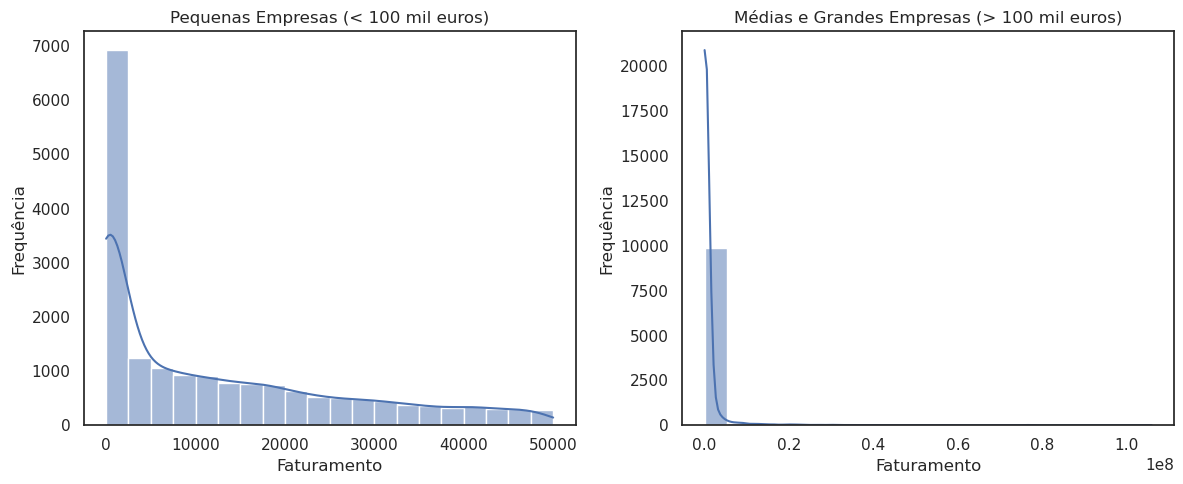

In [65]:
# Criar uma figura com dois subplots (quadrados diferentes)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotar o primeiro histograma na primeira subplot
sns.histplot(data=df[df['company_size'] == 'small'], x='sales', bins=20, kde=True, ax=axes[0])
axes[0].set_xlabel('Faturamento')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Pequenas Empresas (< 100 mil euros)')

# Plotar o segundo histograma na segunda subplot
sns.histplot(data=df[df['company_size'] == 'large_medium'], x='sales', bins=20, kde=True, ax=axes[1])
axes[1].set_xlabel('Faturamento')
axes[1].set_ylabel('Frequência')
axes[1].set_title('Médias e Grandes Empresas (> 100 mil euros)')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()


Mesmo assim, a variável parece muito assimétrica. Para mitigar o problema, vamos aplicar calcular o logaritmo dessa variável.

In [67]:
df['sales_log'] = df['sales'].apply(lambda x: np.log(x) if x > 0 else 0)

Plotando o gráfico dessa variável, vemos que a distribuição ficou mais parecida com a normal, com alguma concentração de valores em ZERO (empresas que supostamente fecharam).

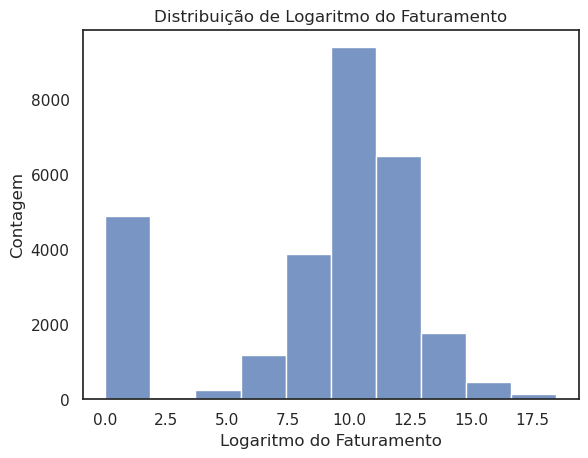

In [69]:
sns.histplot(data=df['sales_log'], bins=10)
plt.xlabel('Logaritmo do Faturamento')
plt.ylabel('Contagem')
plt.title('Distribuição de Logaritmo do Faturamento')
plt.show()

In [ ]:
profile = ProfileReport(df, title='Analise Exploratoria do Projeto Integrador')
profile.to_file(output_file="analise_projeto_integrador.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [83]:
%%html
<iframe src="analise_projeto_integrador.html" width="100%" height="800px"></iframe>

# Proximos passos

## Qualidade
ver as inconsistencias (valores negativos etc) das variaveis  e aplicar o log para variáveis assimétricas
